<a href="https://colab.research.google.com/github/amaluvincent/Fake-News-Detection/blob/main/FINAL_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAKE NEWS DETECTION PROJECT
In this project I am detecting fake news and authentic news from different news article by using 3 Machine Learning models and 1 Neural Network model with the help of Natural Language Processing technique.

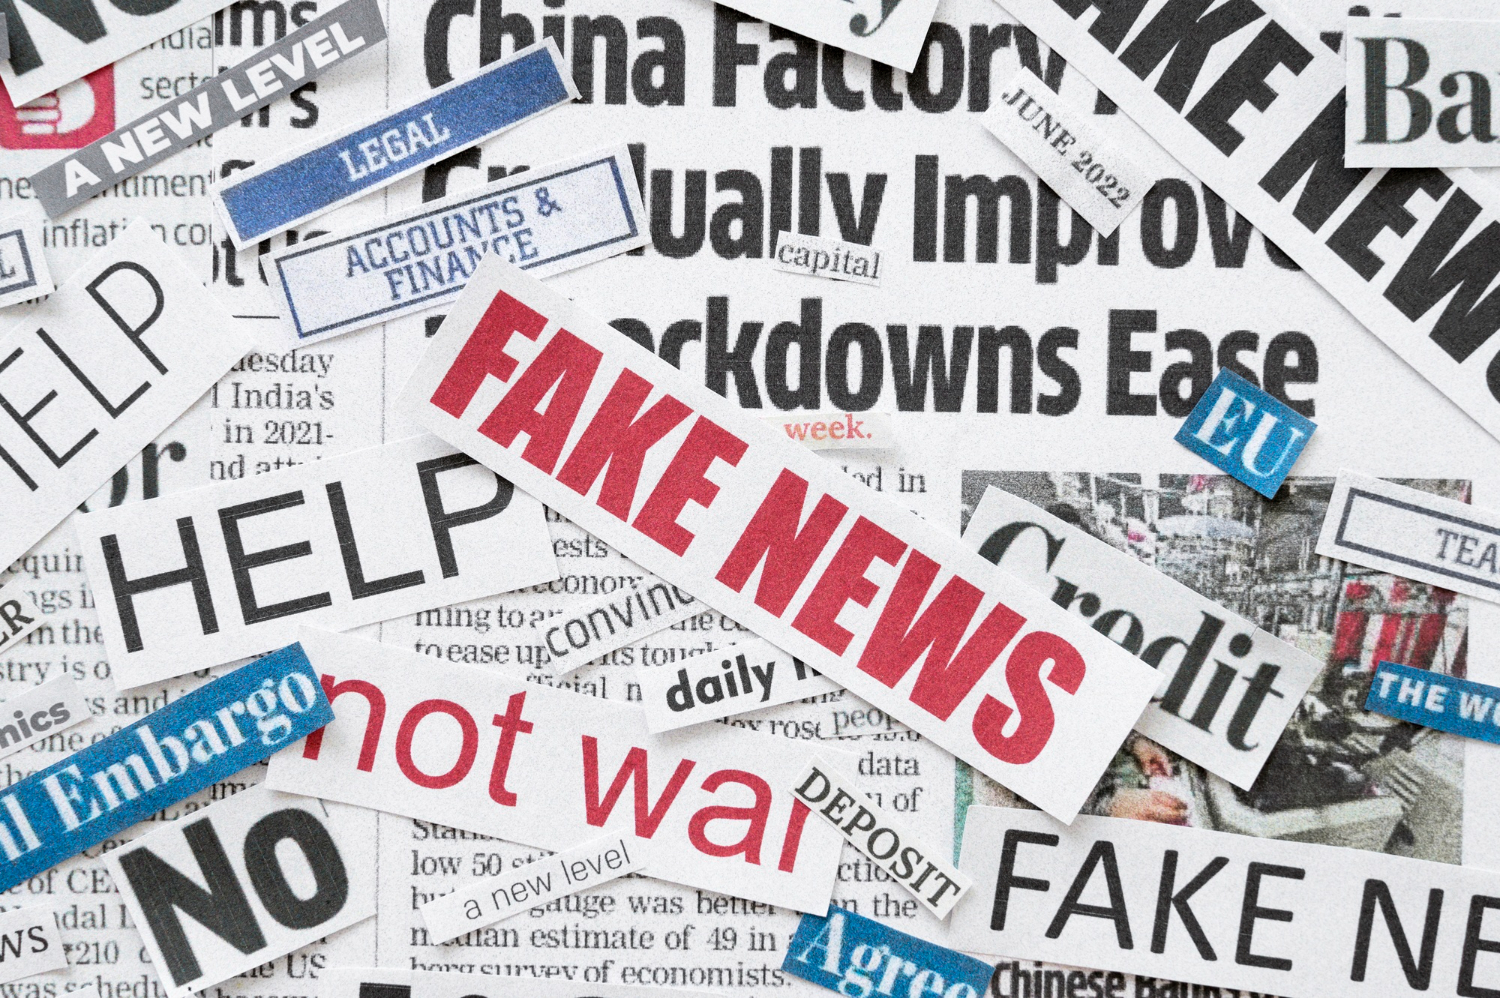

image source: https://www.freepik.com/free-photo/newspaper-background-concept_29016077.htm#fromView=keyword&page=1&position=1&uuid=0807c1d8-4c8a-4019-9159-593b34ab2132&new_detail=true


# 1.Setting up the environment

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras


# 2.Importing libraraies

In [2]:
# import necessary libabaries

import pandas as pd # For data manipulation and handling structured datasets.
import matplotlib.pyplot as plt  # For creating visualizations like plots and charts.
import seaborn as sns  # For advanced and aesthetically pleasing visualizations.
import numpy as np  # For numerical computations and handling arrays/matrices.
import matplotlib.ticker as ticker # support user customizes tickings
from sklearn.pipeline import Pipeline  # For creating a pipeline of machine learning models.
from sklearn.feature_extraction.text import TfidfVectorizer # For combining tokenization, TF-IDF transformation, and vectorization .
from sklearn import feature_extraction, linear_model, model_selection # For feature engineering,linear model and model selection.
from sklearn.model_selection import train_test_split #For splitting data into test and train sets.
from sklearn import metrics # For evaluating the performance of machine learning models.
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, classification_report  # For evaluating the performance.
from sklearn.model_selection import cross_val_score # For handling cross validation.
from sklearn.model_selection import GridSearchCV # For evaluating models
from sklearn.linear_model import LogisticRegression # For importing Logistic Regression model.
from sklearn.ensemble import RandomForestClassifier # For importing Random forest model.
from sklearn.tree import DecisionTreeClassifier # For importing Decision tree model.
from sklearn.naive_bayes import MultinomialNB  # For importing Naive Bayes model.
from sklearn.model_selection import KFold #  For splitting data into training and validation sets for k-fold cross-validation.
import string # For handling string operations relevant to text preprocessing.
from sklearn.utils.class_weight import compute_class_weight # handle  imbalanced dataset

import nltk  # For working with human language data(text).
nltk.download('stopwords') # Downloads a list of comomn words ("like","the","a","is") called stopwords.
nltk.download('punkt_tab') # Downloads the 'punkt' resource, which is used for tokenization .
nltk.download('wordnet') #For tasks like finding synonyms, antonyms, and understanding the relationships between words.
from nltk.corpus import stopwords  # For accessing the list of stopwords.
from nltk.stem import WordNetLemmatizer  # For reducing words to their base form.
from nltk.tokenize import word_tokenize # FOr splitting text into individual words.
from wordcloud import WordCloud  # FOr creating visual representation of word frequencies.
from collections import Counter # For counting the frequency of items .
import warnings # Importing warning module.
warnings.filterwarnings("ignore") #FOr ignoring warning messages.

import tensorflow as tf
from tensorflow.keras.models import Sequential  # For creating a linear stack of layers for LSTM
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization # help the model learn patterns in the text.
from tensorflow.keras.preprocessing.text import Tokenizer # breaking text intoo words
from tensorflow.keras.preprocessing.sequence import pad_sequences #To maintain uniform length
from tensorflow.keras.regularizers import l2 # To prevent overfitting by adding penalties to the model's complexity.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# 3.Load dataset

In [3]:
#3.1. Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news =  pd.read_csv('/content/Fake.csv')

# checking the size of each files
print('true:',true_news.shape)
print('fake:', fake_news.shape)


true: (21417, 4)
fake: (23481, 4)


In [4]:
#3.2. Display dataset info
print("True News Dataset Info:")
true_news.info()
print("\nFake News Dataset Info:")
fake_news.info()


True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# 4. Data cleaning and preparation

In [5]:
#4.1. Check for null values in each column of true_news and fake_news
print("Null values in True News dataset:")
print(true_news.isnull().sum())

print("\nNull values in Fake News dataset:")
print(fake_news.isnull().sum())


Null values in True News dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Null values in Fake News dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [6]:
#4.2. Add a label to each dataframe
true_news['label'] = 0   # 0 for legitimate news
fake_news['label'] = 1   # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news],ignore_index=True)
df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True) # shuffle the data

# Print the combined dataset (first few rows)
print(df.head(5))
print(df.shape)



                                               title  \
0  BREAKING NEWS: NFL Reporter Says Colin Kaepern...   
1  BOOM! INTEL CHAIR Asks FBI/NSA Directors if Ru...   
2   Anonymous Just Declared ‘TOTAL WAR’ On Trump,...   
3  Falwell Jr. endorses Trump for U.S. president:...   
4  FULL INTERVIEW: PRESIDENT TRUMP Nails It On Im...   

                                                text          subject  \
0  NFL reporter Jason LaCanfora updated football ...         politics   
1  Russians didn t hack ANY votes. Period. #Comey...  Government News   
2  Donald  Tiny Hands  Trump might be in for a bi...             News   
3  WASHINGTON (Reuters) - Republican presidential...     politicsNews   
4  https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s         politics   

                date  label  
0        Oct 8, 2017      1  
1       Mar 20, 2017      1  
2     March 15, 2016      1  
3  January 26, 2016       0  
4       Feb 28, 2017      1  
(44898, 5)


In [7]:
#4.3. Check for missing values after combined
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [8]:
# print dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [9]:
#4.4 Removing unnecessary column(date)and (title)
df = df.drop(columns=["date", "title"])
print(df.head())

                                                text          subject  label
0  NFL reporter Jason LaCanfora updated football ...         politics      1
1  Russians didn t hack ANY votes. Period. #Comey...  Government News      1
2  Donald  Tiny Hands  Trump might be in for a bi...             News      1
3  WASHINGTON (Reuters) - Republican presidential...     politicsNews      0
4  https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s         politics      1


In [10]:
#4.5 Removing the word "Reuters"(which is the site were true news collected) in the text
df['text'] = df['text'].str.replace('Reuters', '', case=False)
print(df.head(5))


                                                text          subject  label
0  NFL reporter Jason LaCanfora updated football ...         politics      1
1  Russians didn t hack ANY votes. Period. #Comey...  Government News      1
2  Donald  Tiny Hands  Trump might be in for a bi...             News      1
3  WASHINGTON () - Republican presidential candid...     politicsNews      0
4  https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s         politics      1


In [21]:
#4.6 Define stop words and lemmatizer
stpwrds = set(stopwords.words('english'))
lmtzr = WordNetLemmatizer()

# Function to calculate changes per preprocessing step
def analyze_preprocessing(text):
    if pd.isnull(text) or text.strip() == "":  # Handle NaN or empty string input
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
            'Cleaned Text': ''
        }
    # Initial count of tokens
    original_tokens = word_tokenize(text)   # Tokenization
    total_tokens = len(original_tokens)

     # Check if there are no tokens, return 0 for all changes
    if total_tokens == 0:
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
        }

    # Step-by-step preprocessing
    lowercased_text = text.lower()    # Lowercasing
    lowercased_toks = word_tokenize(lowercased_text)    #Tokenization
    alphabetic_toks = [word for word in lowercased_toks if word.isalpha()]  #Remove non-alphabetic tokens
    non_stopword_toks = [word for word in alphabetic_toks if word not in stpwrds]  # Stopword removal
    lemmatized_toks = [lmtzr.lemmatize(word) for word in non_stopword_toks]    # Lemmatization

    # Calculate changes as percentages
    lowercasing_change = 100 if any(word.isupper() for word in original_tokens) else 0
    non_alpha_removed = (len(lowercased_toks) - len(alphabetic_toks)) / total_tokens * 100 if total_tokens > 0 else 0
    stopword_removed = (len(alphabetic_toks) - len(non_stopword_toks)) / total_tokens * 100 if total_tokens > 0 else 0
    lemmatization_changes = sum(1 for orig, lemma in zip(non_stopword_toks, lemmatized_toks) if orig != lemma) / total_tokens * 100 if non_stopword_toks else 0

     # Join the lemmatized tokens to form the new text
    cleaned_text = ' '.join(lemmatized_toks)

    return {
        'Lowercasing Change (%)': lowercasing_change,
        'Non-Alpha Removed (%)': non_alpha_removed,
        'Stopwords Removed (%)': stopword_removed,
        'Lemmatization Changes (%)': lemmatization_changes,
        'Cleaned Text': cleaned_text
    }

# Apply the analysis function to each text in the dataframe and create a new dataframe to store results
df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)', 'Stopwords Removed (%)',
    'Lemmatization Changes (%)','cleaned_text']] = df['text'].apply(lambda x: pd.Series(analyze_preprocessing(x)))

# Display average percentages across all text entries
average_changes = df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)',
                      'Stopwords Removed (%)', 'Lemmatization Changes (%)']].mean()
print("Average Changes across all texts:\n", average_changes)

Average Changes across all texts:
 Lowercasing Change (%)       94.683505
Non-Alpha Removed (%)        13.395716
Stopwords Removed (%)        37.051598
Lemmatization Changes (%)     5.635583
dtype: float64


In [22]:
# Print the original and cleaned text
print(df[['text','cleaned_text','Lowercasing Change (%)', 'Non-Alpha Removed (%)',
          'Stopwords Removed (%)', 'Lemmatization Changes (%)']].head())  # Display the first few rows

                                                text  \
0  NFL reporter Jason LaCanfora updated football ...   
1  Russians didn t hack ANY votes. Period. #Comey...   
2  Donald  Tiny Hands  Trump might be in for a bi...   
3  WASHINGTON () - Republican presidential candid...   
4  https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s   

                                        cleaned_text  Lowercasing Change (%)  \
0  nfl reporter jason lacanfora updated football ...                     100   
1  russian hack vote period comeyhearing tennesse...                     100   
2  donald tiny hand trump might bit shock soon ha...                       0   
3  washington republican presidential candidate d...                     100   
4                                               http                       0   

   Non-Alpha Removed (%)  Stopwords Removed (%)  Lemmatization Changes (%)  
0              10.846561              44.444444                   4.761905  
1              52.380952    

In [23]:
#4.7 Checking for duplicates
X = df['cleaned_text']
y = df['label']

# Check for duplicates in the input features
print(f"Number of duplicate rows in X: {X.duplicated().sum()}")

# Check for duplicates in the combination of X and y (to consider label alignment)
data = pd.DataFrame({'X': X, 'y': y})
print(f"Number of duplicate rows in combined X and y: {data.duplicated().sum()}")


Number of duplicate rows in X: 6468
Number of duplicate rows in combined X and y: 6467


In [24]:
# 4.8 Combine X and y into a single DataFrame
data = pd.DataFrame({'X': X, 'y': y})

# Drop duplicates based on both features and labels
data = data.drop_duplicates()

# Separate the cleaned data back into X and y
X = data['X']
y = data['y']

# Print the number of duplicates after cleaning
print(f"Number of duplicate rows in X after cleaning: {X.duplicated().sum()}")
print(f"Number of duplicate rows in combined X and y after cleaning: {data.duplicated().sum()}")


Number of duplicate rows in X after cleaning: 1
Number of duplicate rows in combined X and y after cleaning: 0


In [25]:
# Check for NaN values in 'cleaned_text' after preprocessing
missing_values = df['cleaned_text'].isna().sum()
print(f"Number of NaN values in 'new_text': {missing_values}")


Number of NaN values in 'new_text': 0


# 5.Exploratory Data Analysis

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


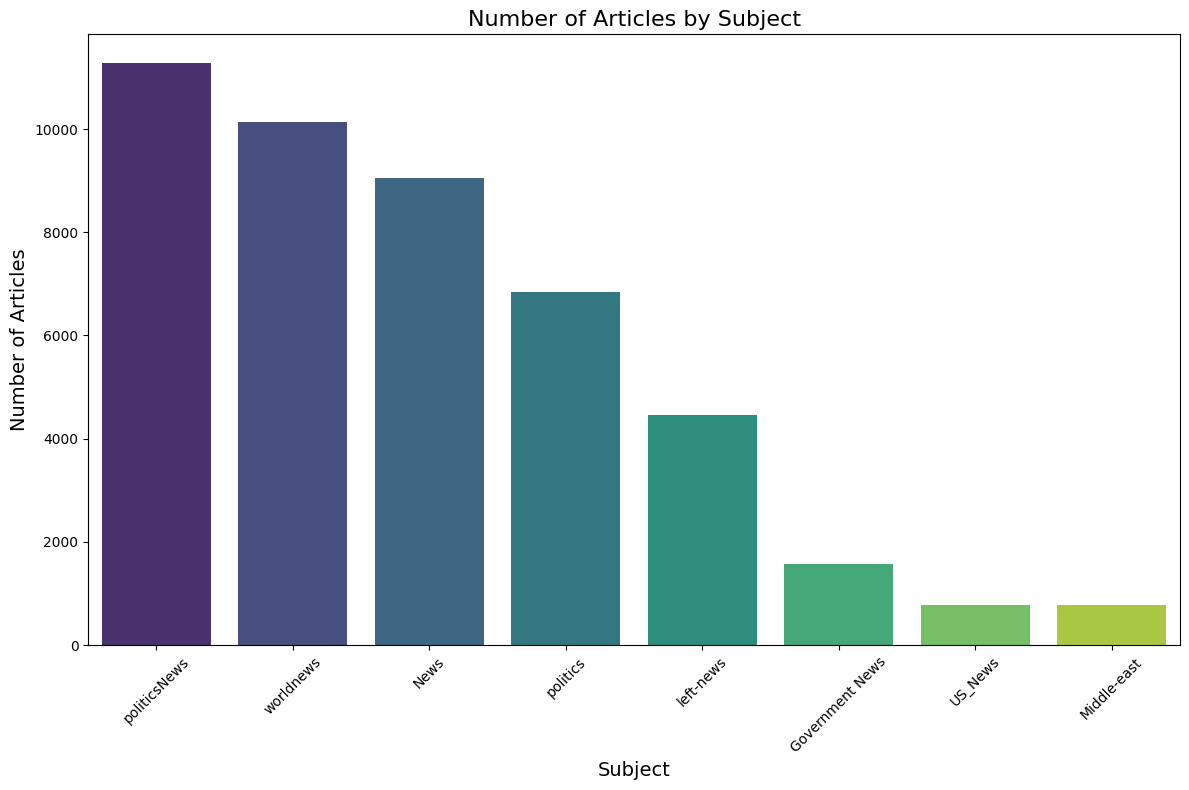

In [ ]:
# 5.1 Count the number of articles by subject
subject_counts = df['subject'].value_counts()
print(subject_counts)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


label
1    23481
0    21417
Name: count, dtype: int64


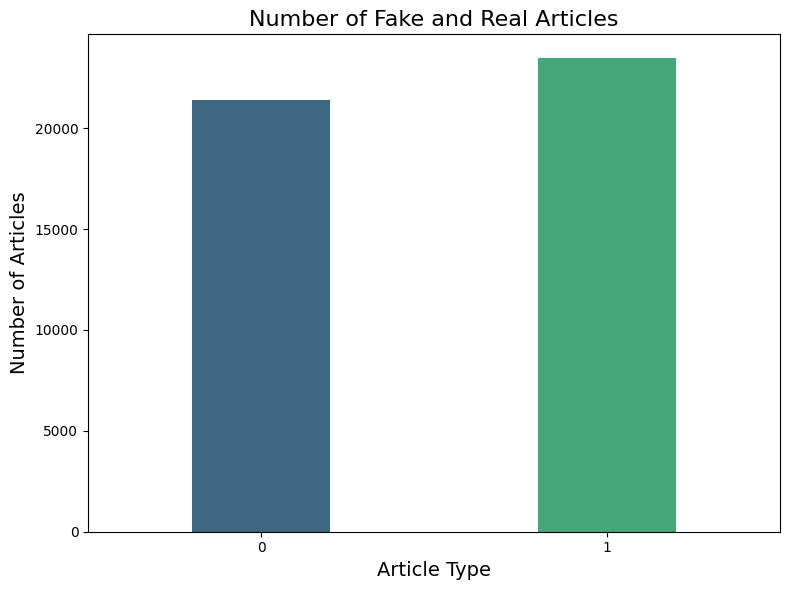

In [ ]:
# 5.2 How many fake and real articles?
article_counts = df['label'].value_counts()
print(article_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=article_counts.index, y=article_counts.values,palette='viridis', width=0.4)
plt.title('Number of Fake and Real Articles', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


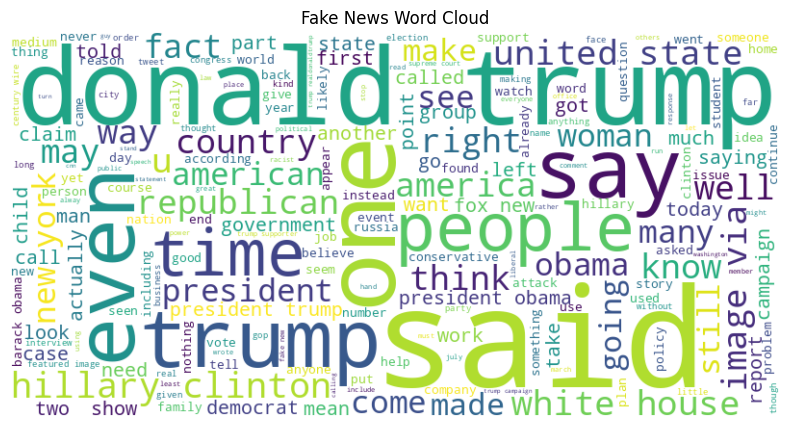

In [27]:
# 5.3 Word cloud for fake news
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
fake_cloud = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(fake_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

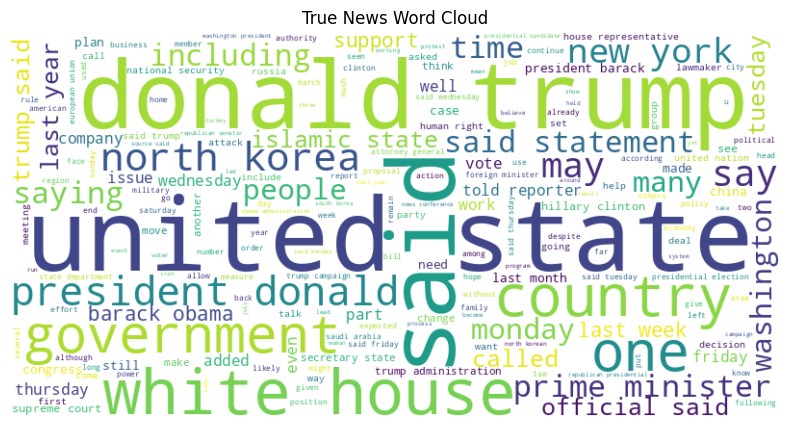

In [28]:
# 5.4 Word cloud for true news
true_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
true_cloud = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(true_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.show()

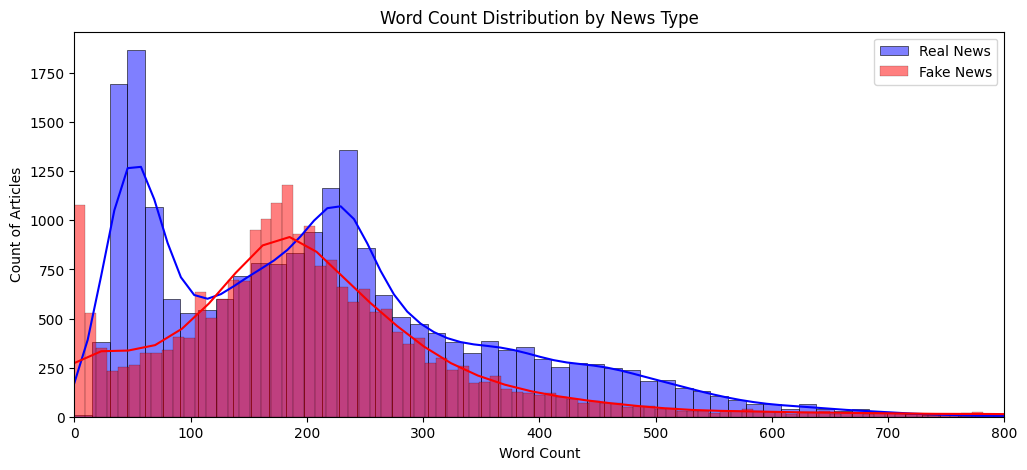

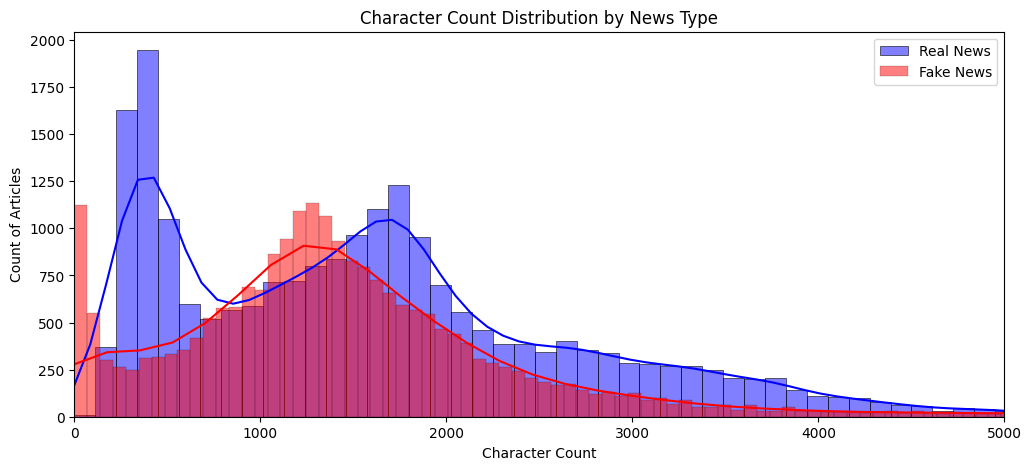

In [29]:
# 5.5 Word count and sentence length analysis
df['word_sum'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['char_sum'] = df['cleaned_text'].apply(len)

# Visualize word and character count distributions
plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['word_sum'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['word_sum'], color='red', label='Fake News', kde=True)
plt.title("Word Count Distribution by News Type")
plt.xlabel("Word Count")
plt.ylabel("Count of Articles")
plt.xlim(0, 800)
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['char_sum'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['char_sum'], color='red', label='Fake News', kde=True)
plt.title("Character Count Distribution by News Type")
plt.xlabel("Character Count")
plt.ylabel("Count of Articles")
plt.xlim(0, 5000)
plt.legend()
plt.show()

Top 20 words in Fake News: [('trump', 74404), ('said', 31150), ('president', 26340), ('people', 26098), ('one', 23812), ('would', 23461), ('state', 22072), ('clinton', 18717), ('like', 18207), ('obama', 17920), ('time', 17885), ('donald', 17235), ('american', 16093), ('republican', 16061), ('say', 15528), ('also', 15243), ('year', 14844), ('new', 14198), ('news', 14198), ('u', 14173)]
Top 20 words in Real News: [('said', 99037), ('trump', 54280), ('state', 36243), ('would', 31526), ('president', 26939), ('republican', 22098), ('government', 19433), ('year', 18721), ('house', 16906), ('new', 16784), ('also', 15946), ('united', 15576), ('people', 15207), ('party', 14964), ('official', 14575), ('told', 14244), ('country', 13948), ('election', 13910), ('could', 13709), ('one', 13025)]


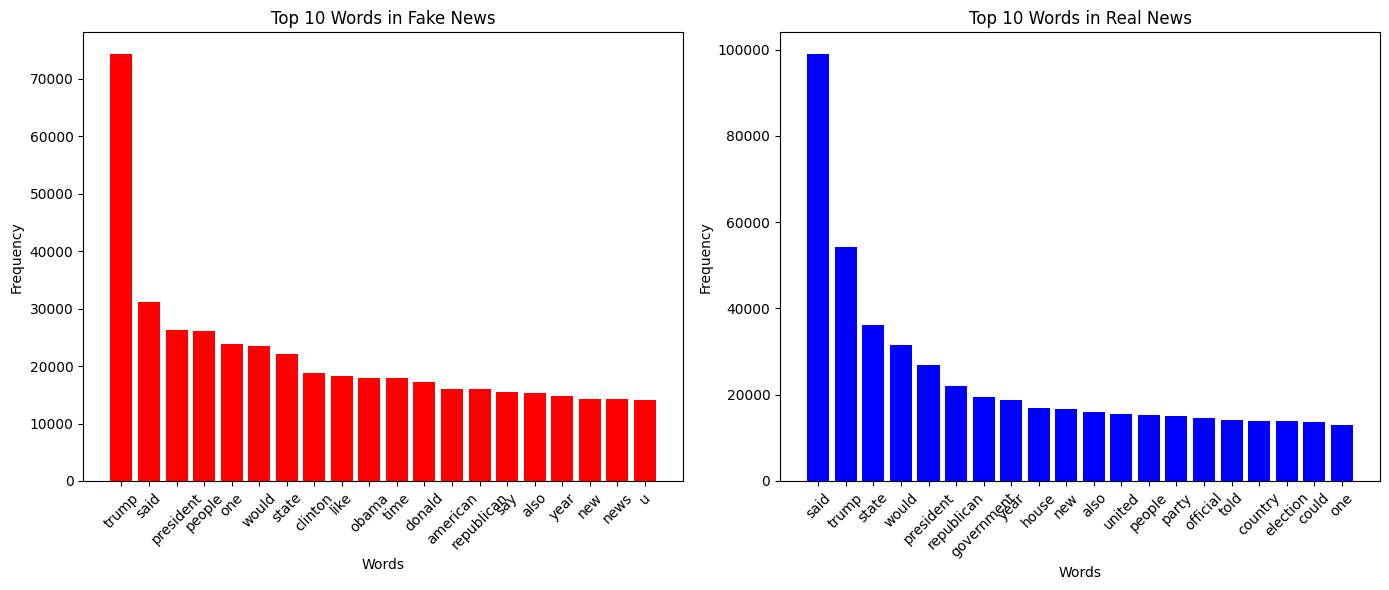

In [ ]:
# 5.6 Most  frequent words counter
# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
counter_fake = Counter(fake_words)  # counting word frequency
top_fake = counter_fake.most_common(20)
print("Top 20 words in Fake News:", counter_fake.most_common(20))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
counter_real = Counter(real_words)
top_real = counter_real.most_common(20)
print("Top 20 words in Real News:", counter_real.most_common(20))

# Unpack the top words and their counts for fake and real news
fake_words_list, fake_counts = zip(*top_fake)
real_words_list, real_counts = zip(*top_real)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Plot
axes[0].bar(fake_words_list, fake_counts, color='red')
axes[0].set_title('Top 10 Words in Fake News')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Words')
axes[0].set_xticklabels(fake_words_list, rotation=45)

# Real News Plot
axes[1].bar(real_words_list, real_counts, color='blue')
axes[1].set_title('Top 10 Words in Real News')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(real_words_list, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# 6.Training & Testing Data

In [ ]:
# 6.1.Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30744,)
y_train shape: (30744,)
X_test shape: (7687,)
y_test shape: (7687,)


In [ ]:
#6.2 Check for overlap between training and testing datasets
common_samples = np.intersect1d(X_train, X_test)
print(f"Number of overlapping samples between train and test: {len(common_samples)}")

# Confirm stratification by comparing class distributions
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Number of overlapping samples between train and test: 1
Class distribution in training set:
y
0    0.547391
1    0.452609
Name: proportion, dtype: float64

Class distribution in testing set:
y
0    0.547418
1    0.452582
Name: proportion, dtype: float64


In [ ]:
#6.3 Removing the common word/ frequent words in both articles to avoid data leakage

# Combine the lists of most frequent words
common_words = set(fake_words_list + real_words_list)

# Function to remove common words from text
def remove_common_words(text):
    return ' '.join([word for word in text.split() if word not in common_words])

# Apply the function to remove common words from training and test sets
X_train = X_train.apply(remove_common_words)
X_test = X_test.apply(remove_common_words)

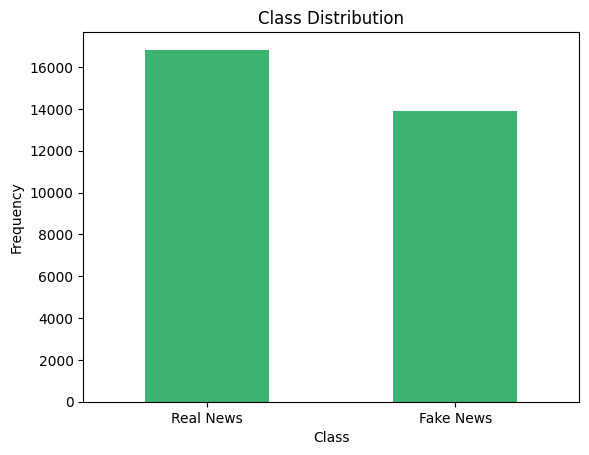

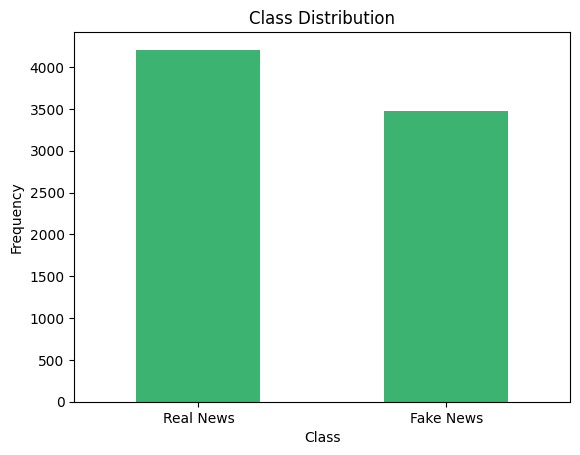

In [ ]:
#6.4 Evaluate class distribution of y_train and y_test

# Plot class distribution
def plot_class_distribution(y):
    y.value_counts().plot(kind='bar', color='mediumseagreen')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'], rotation=0)
    plt.show()

# Plot class distribution for training and test sets
plot_class_distribution(y_train)
plot_class_distribution(y_test)

# 7. Feature Extraction
This part of the code deals with converting the text data (news articles) into a numerical format that machine learning models can understand. This process is called feature extraction. The specific technique used here is called TF-IDF (Term Frequency-Inverse Document Frequency).

1)tf (term frequency):-which counts the number of time a particular words is repearting in a documents.

2)idf (inverse document frequency):-Measure the word is a rare word or common word in a document

In [ ]:
vectorization = TfidfVectorizer(max_features=10000,ngram_range=(1,2))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [ ]:
print("Vocabulary size:", len(vectorization.vocabulary_))


Vocabulary size: 10000


# 8. Model Training & Evaluation

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### 8.1 Logistic Regression:
A supervised machine learning algorithm
widely used for binary classification tasks.Logistic regression is used to
predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1.

This code performs a systematic search for the best hyperparameters for a Logistic Regression model using cross-validation, trains the model with those parameters, and then evaluates its performance on unseen test data. This process helps to find a model that generalizes well to new data and provides a reliable estimate of its accuracy.

In [ ]:
# Initialize and train Logistic Regression Model
para_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

grd_srch = GridSearchCV(log_reg, para_grid, cv=5, scoring='accuracy', n_jobs=-1)
grd_srch.fit(xv_train, y_train)
print(f"Best Parameters for Logistic Regression: {grd_srch.best_params_}")

#Train the model with the best parameters
best_logreg = grd_srch.best_estimator_

# Evaluate on the test data
pred_logreg = best_logreg.predict(xv_test)
print("Logistic Regression with Best Parameters - Accuracy:", best_logreg.score(xv_test, y_test))


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression with Best Parameters - Accuracy: 0.9797059971380252



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4208
           1       0.98      0.97      0.98      3479

    accuracy                           0.98      7687
   macro avg       0.98      0.98      0.98      7687
weighted avg       0.98      0.98      0.98      7687



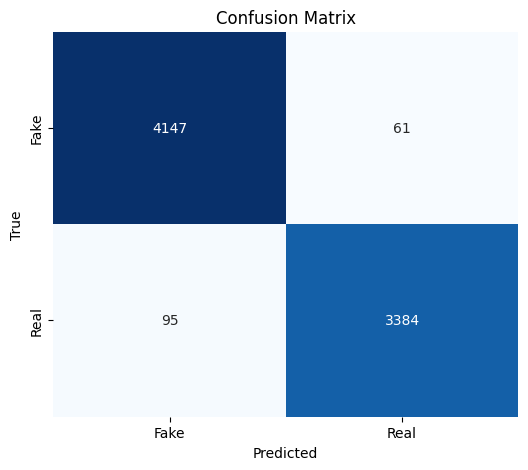

In [ ]:
# Classification report and plot confusion matrix
print("\nLogistic Regression Classification Report:")
print (classification_report(y_test, pred_logreg))
cm = metrics.confusion_matrix(y_test, pred_logreg)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [ ]:
# Perform 5-fold cross-validation
crsval_scores = cross_val_score(log_reg, xv_test, y_test, cv=5)
print(f"Cross-validated scores: {crsval_scores}")
print(f"Mean accuracy: {crsval_scores.mean()} ± {crsval_scores.std()}")

Cross-validated scores: [0.95968791 0.9603381  0.95770982 0.96161353 0.95380612]
Mean accuracy: 0.9586310961603379 ± 0.0027223086019370017


## 8.2 Random Forest
 A machine learning technique that uses a collection of decision trees to solve problems like classification and regression:
The algorithm creates many decision trees, each trained with a different random noise. The output of the random forest is the class or value that most of the trees select.

In [ ]:
# Define the parameter grid for Random Forest
para_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 15]}

#Initialize Random Forest Model
Rand_for = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grd_srch = GridSearchCV(Rand_for, para_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Use n_jobs=-1 for parallel processing
grd_srch.fit(xv_train, y_train)  # Use the vectorized training data

# Print the best parameters
print(f"Best Parameters: {grd_srch.best_params_}")

# Train the model with the best parameters
best_randfor = grd_srch.best_estimator_

# Evaluate on the test data
pred_randfor = best_randfor.predict(xv_test)
print("Random Forest with Best Parameters - Accuracy:", best_randfor.score(xv_test, y_test))


Best Parameters: {'max_depth': 15, 'n_estimators': 200}
Random Forest with Best Parameters - Accuracy: 0.9167425523611292



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4208
           1       0.98      0.83      0.90      3479

    accuracy                           0.92      7687
   macro avg       0.93      0.91      0.91      7687
weighted avg       0.92      0.92      0.92      7687



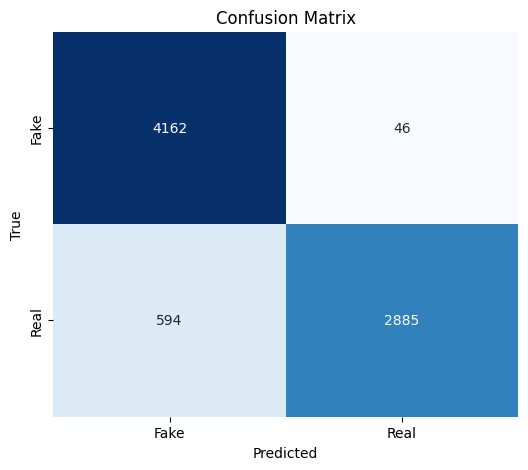

In [ ]:
# Classification report and plot confusion matrix
print("\nRandom Forest Classification Report:")
print (classification_report(y_test, pred_randfor))
cm = metrics.confusion_matrix(y_test, pred_randfor)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
crsval_scores = cross_val_score(Rand_for, xv_test, y_test, cv=5)
print(f"Cross-validated scores: {crsval_scores}")
print(f"Mean accuracy: {crsval_scores.mean()} ± {crsval_scores.std()}")

Cross-validated scores: [0.94863459 0.95578674 0.95380612 0.94729993 0.94729993]
Mean accuracy: 0.9505654624168643 ± 0.003544549018524595


# 8.3 Naive Bayes
The Naïve Bayes algorithm is a probabilistic machine learning method used for text classification and multiple class labeling problems. It learns the probability of each object's features and group, then uses predictions to identify the acceptable class.

In [ ]:
# Define the parameter grid for MultinomialNB
para_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]}

#Initializing Naive Bayes model
np.random.seed(42)
Naive_bay = MultinomialNB()

# Set up GridSearchCV
grd_srch = GridSearchCV(Naive_bay, para_grid, cv=5, scoring='accuracy', n_jobs=-1)
grd_srch.fit(xv_train, y_train)  # Use vectorized training data

# Print the best parameters
print(f"Best Parameters for Naive Bayes: {grd_srch.best_params_}")

# Train the model with the best parameters
best_naive_bay = grd_srch.best_estimator_

# Evaluate on the test data
pred_naivebay = best_naive_bay.predict(xv_test)
print("Naive Bayes with Best Parameters - Accuracy:", best_naive_bay.score(xv_test, y_test))


Best Parameters for Naive Bayes: {'alpha': 0.001}
Naive Bayes with Best Parameters - Accuracy: 0.9417197866527904



Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4208
           1       0.93      0.94      0.94      3479

    accuracy                           0.94      7687
   macro avg       0.94      0.94      0.94      7687
weighted avg       0.94      0.94      0.94      7687



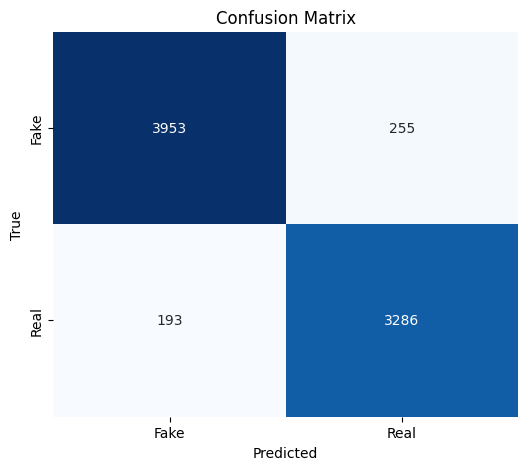

In [ ]:
# CLassification report and plot confusion matrix
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, pred_naivebay))
cm = metrics.confusion_matrix(y_test, pred_naivebay)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Perform 5-fold cross-validation
crsval_scores = cross_val_score(Naive_bay, xv_test, y_test, cv=5)
print(f"Cross-validated scores: {crsval_scores}")
print(f"Mean accuracy: {crsval_scores.mean()} ± {crsval_scores.std()}")

Cross-validated scores: [0.92587776 0.92977893 0.93103448 0.92973325 0.93233572]
Mean accuracy: 0.929752029056993 ± 0.0021601459415172414


# 8.4 LSTM
LSTM stands for Long Short-Term Memory. It's a special kind of recurrent neural network (RNN) LSTM networks are a powerful tool for text analysis and classification. They are well-suited for fake news detection because they can understand the relationships between words within a text sequence.Here I am  using a Bidirectional LSTM, offering an advantage for capturing these relationships effectively.

In [ ]:
# Parameters
max_words = 10000
max_len = 150
embedding_dim = 50
epochs = 10  # Increased epochs
batch_size = 32

# Prepare data for LSTM with Dropout, Regularization, and Class Weight
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_scores = []
history_list = []  # Store training history for each fold

# Compute class weights to deal with imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

for train_index, val_index in kf.split(X):
    print(f"Training Fold {fold_no}...")

    # Split data into train and validation sets
    X_train_fold = X.iloc[train_index]
    X_val_fold = X.iloc[val_index]
    y_train_fold = y.iloc[train_index]
    y_val_fold = y.iloc[val_index]

    # Reset index to ensure continuous range for y_train_fold and y_val_fold
    y_train_fold = y_train_fold.reset_index(drop=True)
    y_val_fold = y_val_fold.reset_index(drop=True)

    # Tokenization and Padding
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train_fold)

    X_train_seq = tokenizer.texts_to_sequences(X_train_fold)
    X_val_seq = tokenizer.texts_to_sequences(X_val_fold)

    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
    X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

    # Define the LSTM model with Dropout and Regularization
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01),
                           recurrent_regularizer=l2(0.01))),
        BatchNormalization(),
        Dropout(0.4),  # Slightly reduced dropout
        LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),  # Slightly reduced dropout
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),  # Slightly reduced dropout
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Train with class weights
    history = model.fit(X_train_pad, y_train_fold, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val_pad, y_val_fold),
                        class_weight=class_weight_dict, verbose=1)

    history_list.append(history)

    # Evaluate the model
    val_preds = (model.predict(X_val_pad) > 0.5).astype(int)
    val_accuracy = accuracy_score(y_val_fold, val_preds)
    accuracy_scores.append(val_accuracy)

    print(f"Fold {fold_no} Accuracy: {val_accuracy}")
    fold_no += 1

model.summary()



Training Fold 1...
Epoch 1/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.8655 - loss: 1.9785 - val_accuracy: 0.8298 - val_loss: 0.6242
Epoch 2/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9692 - loss: 0.1502 - val_accuracy: 0.9646 - val_loss: 0.1271
Epoch 3/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9782 - loss: 0.0934 - val_accuracy: 0.9551 - val_loss: 0.1435
Epoch 4/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9836 - loss: 0.0715 - val_accuracy: 0.9702 - val_loss: 0.1138
Epoch 5/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9893 - loss: 0.0556 - val_accuracy: 0.9754 - val_loss: 0.1061
Epoch 6/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9916 - loss: 0.0483 - val_accuracy: 0.9684 - val_loss: 0.1442
Epoch 7/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9920 - loss: 0.0451 - val_accuracy: 0.9615 - val_loss: 0.1708
Epoch 8/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.994

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 150, 50)             │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 150, 128)            │          58,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 150, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 150, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,746,789 (6.66 MB)

 Trainable params: 582,113 (2.22 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,164,228 (4.44 MB)

In [ ]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean Accuracy after 5-Fold Cross-Validation: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Accuracy scores for each fold: [0.9653961233250943, 0.9717668488160291, 0.9731980223783503, 0.970335675253708, 0.9663023679417122]
Mean Accuracy after 5-Fold Cross-Validation: 0.9694
Standard Deviation of Accuracy: 0.0031



LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4229
           1       0.97      0.95      0.96      3457

    accuracy                           0.97      7686
   macro avg       0.97      0.96      0.97      7686
weighted avg       0.97      0.97      0.97      7686



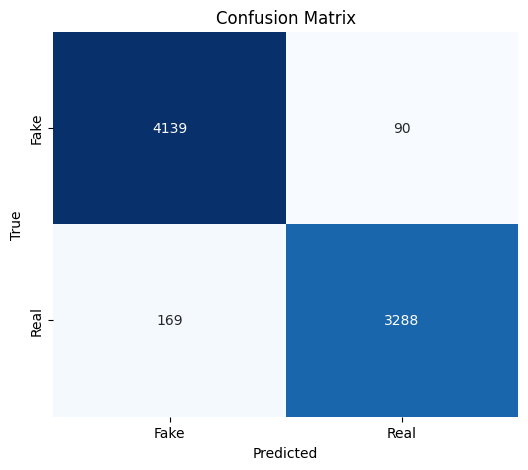

In [ ]:
print("\nLSTM Classification Report:")
print(classification_report(y_val_fold, val_preds))
cm = confusion_matrix(y_val_fold, val_preds)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

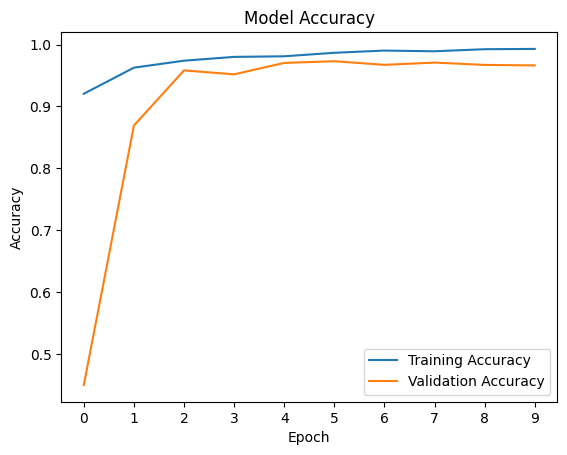

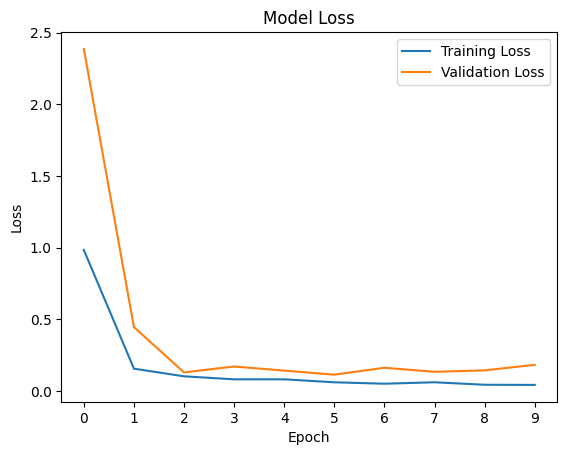

In [ ]:

# visualizing epochs plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

# 9.Result Comparison
Here I am plotting the results of all these models Logistic Regression,Random Forest,Naive Bayes and BiLSTM for comparing result

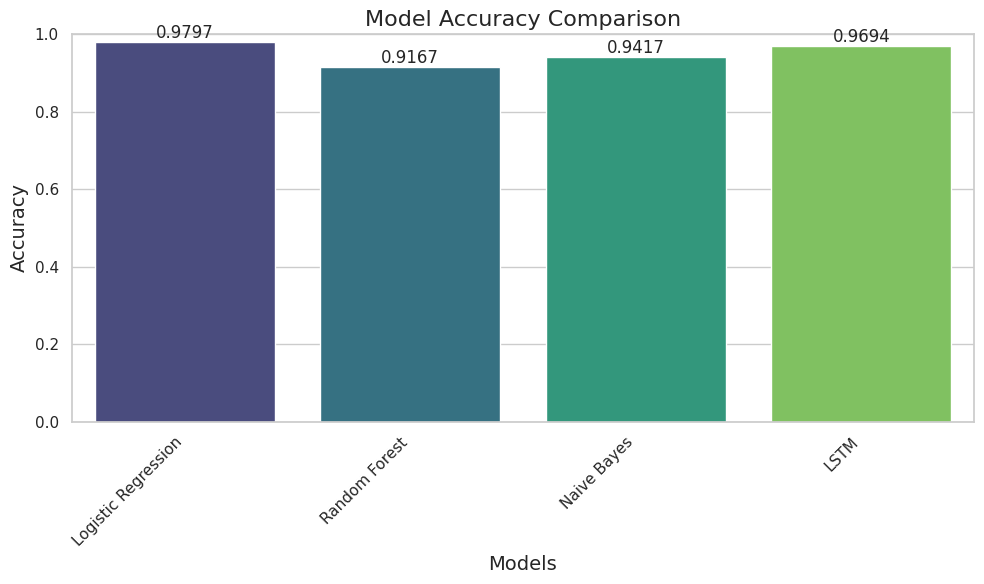

In [ ]:
# Model names for the plot
model_names = ['Logistic Regression',  'Random Forest', 'Naive Bayes', 'LSTM']
accuracy_lr = best_logreg.score(xv_test, y_test)
accuracy_rf = best_randfor.score(xv_test, y_test)
accuracy_nb = best_naive_bay.score(xv_test, y_test)
accuracy_lstm = np.mean(accuracy_scores)

# Accuracy scores for each model
accuracies = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_lstm]  # Use mean accuracy for LSTM from cross-validation

# Create a DataFrame for better handling with seaborn
data = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Set the seaborn style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')

# Title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.0)  # Set y-axis limits to 0-1 for accuracy

# Add accuracy scores on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Tight layout for better presentation
plt.tight_layout()

# Show plot
plt.show()

